# Pyber Ride Sharing Analysis
1. About 70% of all rides, fares and drivers come from the Urban area

2. The Urban areas has the most riders and drivers, but the average fares in the a bit low when compared to the other ares, this is probably because of a lot more drivers in the urban area, hence the competition drives the price down. It could also be that the rides in the urban area is shorter hence less charges.

3. The Rural areas with less driver counts has a slightly high total fare, indicating a possible higher demand for drivers and so costing the riders more to ride in the rural areas.

In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")


#Read the City and Ride Data
city_data_to_load.head(5)
ride_data_to_load.head(5)

# Combine the data into a single dataset
combined_city_ride_data = pd.merge(ride_data_to_load, city_data_to_load, on="city", how="left")

# Display the data table for preview

#combined_city_ride_data = combined_city_ride_data.set_index("city")
combined_city_ride_data.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

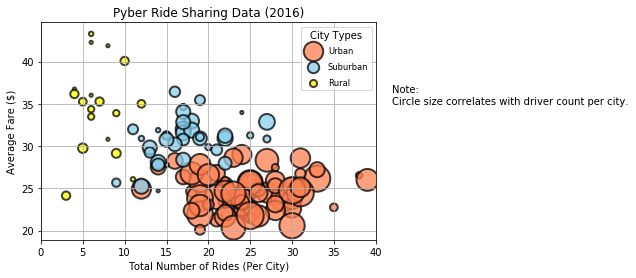

In [5]:
# Obtain the x and y coordinates for each of the three city types

   #Get city type
urban_city = combined_city_ride_data[combined_city_ride_data["type"] == "Urban"]
#urban_city.head(5)
suburban_city = combined_city_ride_data[combined_city_ride_data["type"] == "Suburban"]
#suburban_city.head(5)
rural_city = combined_city_ride_data[combined_city_ride_data["type"] == "Rural"]
#rural_city.head(5)

    #Get ride counts
urban_ride_counts = urban_city.groupby(["city"]).count()["ride_id"]
#urban_ride_counts.head(5)
suburban_ride_counts = suburban_city.groupby(["city"]).count()["ride_id"]
#suburban_ride_counts.head(5)
rural_ride_counts = rural_city.groupby(["city"]).count()["ride_id"]
#rural_ride_counts.head(5)

    #Get average fare
urban_avg_fare = urban_city.groupby(["city"]).mean()["fare"]
#urban_avg_fare.head(5)
suburban_avg_fare = suburban_city.groupby(["city"]).mean()["fare"]
#suburban_avg_fare.head(5)
rural_avg_fare = rural_city.groupby(["city"]).mean()["fare"]
#rural_avg_fare.head(5)


    #Get driver counts
urban_driver_count = urban_city.groupby(["city"]).mean()["driver_count"]
#urban_driver_count.head(5)
suburban_driver_count = suburban_city.groupby(["city"]).mean()["driver_count"]
#suburban_driver_count.head(5)
rural_driver_count = rural_city.groupby(["city"]).mean()["driver_count"]
#rural_driver_count.head(5)



# Build the scatter plots for each city types

plt.scatter(urban_ride_counts,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=2, marker="o",
            alpha=0.75, label="Urban")

plt.scatter(suburban_ride_counts,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=2, marker="o",
            alpha=0.75, label="Suburban")

plt.scatter(rural_ride_counts,
            rural_avg_fare,
            s=10*rural_driver_count, c="yellow",
            edgecolor="black", linewidths=2, marker="o",
            alpha=0.75, label="Rural")

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim(0,40)
plt.grid(True)


# Create a legend
legend = plt.legend(fontsize = "small", mode = "Expanded", numpoints=1, scatterpoints=1, 
                   loc="best", title ="City Types", labelspacing = 0.8)
legend.legendHandles[0]._size = [30]
legend.legendHandles[1]._size = [30]
legend.legendHandles[2]._size = [30]


# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("analysis/scatterplot_fig.png")

# Show plot
plt.show()

## Total Fares by City Type

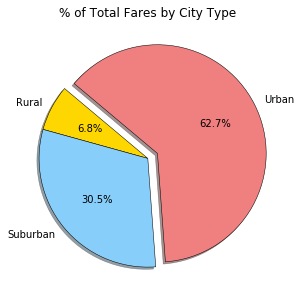

In [6]:
# Calculate Type Percents
City_type_percents = 100*combined_city_ride_data.groupby(["type"]).sum()["fare"] / combined_city_ride_data["fare"].sum()

#City_type_percents

# Build Pie Chart
plt.figure(figsize = (9,5))
plt.pie(City_type_percents,
       labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0, 0, 0.1],
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 140,
        wedgeprops = {'linewidth':.5, 'edgecolor': 'black'}
       )
#plt.axis("equal")

plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("analysis/Total_Fares_City_Types.png")

# Show Figure
plt.show()

In [25]:
# Show Figure
plt.show()

## Total Rides by City Type

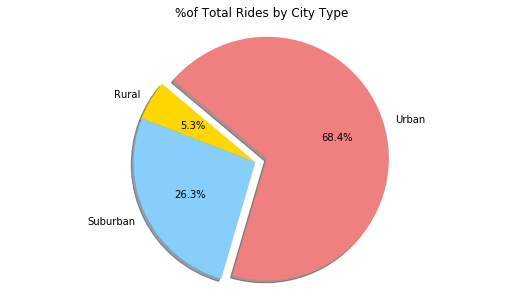

In [7]:
# Calculate Ride Percents

city_ride_percents = 100 * combined_city_ride_data.groupby(["type"]).count()["ride_id"] / combined_city_ride_data["ride_id"].count()
#city_ride_percents

# Build Pie Chart
plt.figure(figsize = (9,5))
plt.pie(city_ride_percents, 
        labels  = ["Rural", "Suburban", "Urban"], 
        colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0, 0, 0.1],
        autopct='%1.1f%%', 
        shadow = True, 
        startangle = 140)
       #wedgeprops = {'linewidth':.5, 'edgecolor': 'black'})
plt.axis("equal")
plt.title("%of Total Rides by City Type")

# Save Figure
plt.savefig("analysis/Total_Rides_City_Types.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

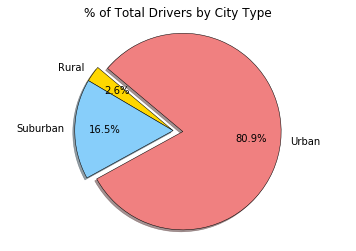

In [8]:
# Calculate Driver Percents

city_driver_percents = 100 * city_data_to_load.groupby(["type"]).sum()["driver_count"] / city_data_to_load["driver_count"].sum()
city_driver_percents

# Build Pie Charts
plt.pie(city_driver_percents,
       labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%', pctdistance=0.70,
       shadow=True, 
       startangle=140,
       wedgeprops = {'linewidth':.5, 'edgecolor': 'black'})
plt.axis("equal")
plt.title("% of Total Drivers by City Type")


# Save Figure
plt.savefig("analysis/Total_Rides_City_drivers.png")

In [ ]:
# Show Figure
plt.show()